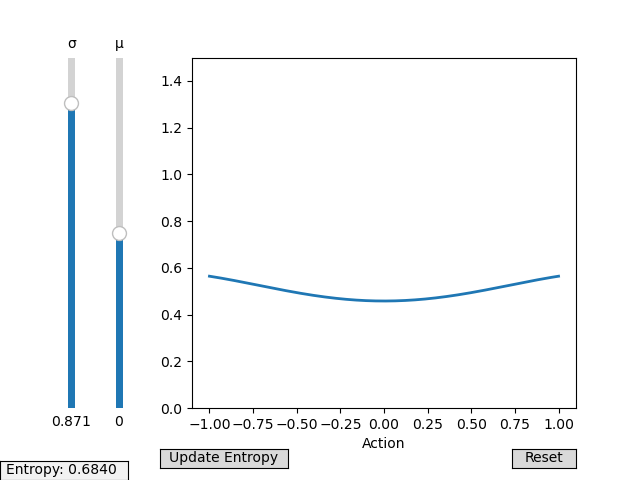

In [10]:
# %%
import torch
from torch.distributions import Normal
from torch.nn.functional import softplus
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, TextBox

%matplotlib widget

π = np.pi

# The parametrized function to be plotted
def the_function(t, μ, σ):
    # return μ * np.sin(2 * π * σ * t)

    pi_distribution = Normal(μ, σ)

    pi_action = torch.tensor(t)

    logp_pi = pi_distribution.log_prob(pi_action)
    logp_pi -= (2 * (np.log(2) - pi_action - softplus(-2 * pi_action)))

    return torch.exp(logp_pi)

def entropy(μ, σ):
    pi_distribution = Normal(μ, σ)
    pi_action = pi_distribution.sample((100000,))

    logp_pi = pi_distribution.log_prob(pi_action)
    logp_pi -= (2 * (np.log(2) - pi_action - softplus(-2 * pi_action)))

    return f"Entropy: {-logp_pi.mean().item():.4f}"


ε = 1e-15
t = np.linspace(-1 + ε, 1 - ε, 1000)

# Define initial parameters
init_μ = 0
init_σ = 0.871

lower = 0.15
upper = 0.73

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
(line,) = plt.plot(t, the_function(t, init_μ, init_σ), lw=2)
ax.set_xlabel("Action")
ax.set_ylim(0, 1.5)

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.3, bottom=lower)

# Make a horizontal slider to control the σ.
ax_sigma = plt.axes([0.1, lower, 0.0225, upper])
freq_slider = Slider(
    ax=ax_sigma,
    label="σ",
    valmin=np.exp(-20),
    # valmax=np.exp(2),
    valmax=1.0,
    valinit=init_σ,
    orientation="vertical",
)


# Make a vertically oriented slider to control the μ
ax_mu = plt.axes([0.175, lower, 0.0225, upper])
amp_slider = Slider(
    ax=ax_mu,
    label="μ",
    valmin=-5,
    valmax=5,
    valinit=init_μ,
    orientation="vertical",
)

ax_entropy = plt.axes([0., 0, 0.2, 0.04])
ent_box = TextBox(ax=ax_entropy, label="ent", initial=entropy(init_μ, init_σ))

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(the_function(t, amp_slider.val, freq_slider.val))
#     ent_box.set_val(entropy(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, "Reset", hovercolor="0.975")
def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)


updateax = plt.axes([0.25, 0.025, 0.2, 0.04])
button2 = Button(updateax, "Update Entropy", hovercolor="0.975")
def update(event):
    ent_box.set_val(entropy(amp_slider.val, freq_slider.val))
button2.on_clicked(update)

plt.show()

